In [58]:
import pandas as pd
import pickle
import os

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', None)


In [59]:
# 文件路径
baseline_path = 'experiment_results_baseline_qwen-plus.pkl'
mastery_path = 'experiment_results_mastery_only_qwen-plus.pkl'
tutoring_path = 'experiment_results_tutoring_only_qwen-plus.pkl'

# 检查文件是否存在
print("="*80)
print("📁 检查实验结果文件".center(80))
print("="*80)
print(f"✅ Baseline 文件存在: {os.path.exists(baseline_path)}")
print(f"✅ Mastery Only 文件存在: {os.path.exists(mastery_path)}")
print(f"✅ Tutoring Only 文件存在: {os.path.exists(tutoring_path)}")


                                   📁 检查实验结果文件                                   
✅ Baseline 文件存在: True
✅ Mastery Only 文件存在: True
✅ Tutoring Only 文件存在: True


In [60]:
# 加载三组实验数据
print("\n" + "="*80)
print("📥 加载实验结果数据".center(80))
print("="*80)

# 1. Baseline
print("\n🔵 加载 Baseline 数据...")
df_baseline = pd.read_pickle(baseline_path)
print(f"   ✅ 数据形状: {df_baseline.shape}")
print(f"   👥 学生数量: {df_baseline['student_id'].nunique()}")
print(f"   ❓ 题目数量: {df_baseline['question_id'].nunique()}")

# 2. Mastery Only
print("\n🟢 加载 Mastery Only 数据...")
df_mastery = pd.read_pickle(mastery_path)
print(f"   ✅ 数据形状: {df_mastery.shape}")
print(f"   👥 学生数量: {df_mastery['student_id'].nunique()}")
print(f"   ❓ 题目数量: {df_mastery['question_id'].nunique()}")

# 3. Tutoring Only
print("\n🟡 加载 Tutoring Only 数据...")
df_tutoring = pd.read_pickle(tutoring_path)
print(f"   ✅ 数据形状: {df_tutoring.shape}")
print(f"   👥 学生数量: {df_tutoring['student_id'].nunique()}")
print(f"   ❓ 题目数量: {df_tutoring['question_id'].nunique()}")

print("\n" + "="*80)
print("✅ 所有数据加载完成".center(80))
print("="*80)



                                   📥 加载实验结果数据                                   

🔵 加载 Baseline 数据...
   ✅ 数据形状: (16775, 16)
   👥 学生数量: 1140
   ❓ 题目数量: 212

🟢 加载 Mastery Only 数据...
   ✅ 数据形状: (16775, 16)
   👥 学生数量: 1140
   ❓ 题目数量: 212

🟡 加载 Tutoring Only 数据...
   ✅ 数据形状: (485, 16)
   👥 学生数量: 30
   ❓ 题目数量: 172

                                   ✅ 所有数据加载完成                                   


In [61]:
# 验证数据一致性
print("\n" + "="*80)
print("🔍 数据一致性检查".center(80))
print("="*80)

# 检查三组实验是否使用相同的学生和题目
baseline_students = set(df_baseline['student_id'].unique())
mastery_students = set(df_mastery['student_id'].unique())
tutoring_students = set(df_tutoring['student_id'].unique())

baseline_questions = set(df_baseline['question_id'].unique())
mastery_questions = set(df_mastery['question_id'].unique())
tutoring_questions = set(df_tutoring['question_id'].unique())

print(f"\n👥 学生ID一致性:")
print(f"   Baseline vs Mastery: {'✅ 一致' if baseline_students == mastery_students else '❌ 不一致'}")
print(f"   Baseline vs Tutoring: {'✅ 一致' if baseline_students == tutoring_students else '❌ 不一致'}")
print(f"   Mastery vs Tutoring: {'✅ 一致' if mastery_students == tutoring_students else '❌ 不一致'}")

print(f"\n❓ 题目ID一致性:")
print(f"   Baseline vs Mastery: {'✅ 一致' if baseline_questions == mastery_questions else '❌ 不一致'}")
print(f"   Baseline vs Tutoring: {'✅ 一致' if baseline_questions == tutoring_questions else '❌ 不一致'}")
print(f"   Mastery vs Tutoring: {'✅ 一致' if mastery_questions == tutoring_questions else '❌ 不一致'}")

print(f"\n📊 数据量对比:")
print(f"   Baseline:  {len(df_baseline):,} 条记录")
print(f"   Mastery:   {len(df_mastery):,} 条记录")
print(f"   Tutoring:  {len(df_tutoring):,} 条记录")



                                   🔍 数据一致性检查                                    

👥 学生ID一致性:
   Baseline vs Mastery: ✅ 一致
   Baseline vs Tutoring: ❌ 不一致
   Mastery vs Tutoring: ❌ 不一致

❓ 题目ID一致性:
   Baseline vs Mastery: ✅ 一致
   Baseline vs Tutoring: ❌ 不一致
   Mastery vs Tutoring: ❌ 不一致

📊 数据量对比:
   Baseline:  16,775 条记录
   Mastery:   16,775 条记录
   Tutoring:  485 条记录


In [62]:
# 查看 Baseline 数据前几行
print("="*80)
print("Baseline 数据预览（前3行）")
print("="*80)
df_baseline.head(3)


Baseline 数据预览（前3行）


,student_id,question_id,true_know_name,true_score,true_answer_choice_id,true_answer_text,predicted_task1_selfpredict,predicted_task2_know_name,predicted_task3_reasoning,predicted_task4_answer_choice,llm_raw_response,mastery_summary,tutoring_summary,experiment_type,question_choices,experiment_mode
0,1,119,Functional dependencies,1,403,NaN,Yes,Functional dependencies,I need to check if Σ1 and Σ2 are equivalent. Two sets of functional dependencies are equivalent ...,B,Task1: Yes \nTask2: Functional dependencies \nTask3: I need to check if Σ1 and Σ2 are equivale...,None,None,baseline,"[{'choice_id': 402, 'choice_text': 'True', 'is_correct': False}, {'choice_id': 403, 'choice_text...",baseline
1,1,101,Participation constraints,1,353,NaN,Yes,Participation constraints,"The question is asking about the participation constraint of the ""member"" entity in the ""partici...",A,Task1: Yes \nTask2: Participation constraints \nTask3: The question is asking about the partic...,None,None,baseline,"[{'choice_id': 353, 'choice_text': 'Partial', 'is_correct': True}, {'choice_id': 354, 'choice_te...",baseline
2,1,134,Boyce-Codd normal form (BCNF),1,440,NaN,Yes,Boyce-Codd normal form (BCNF),I feel comfortable with this because functional dependencies and normal forms—especially 3NF and...,A,Task1: Yes \nTask2: Boyce-Codd normal form (BCNF) \nTask3: I feel comfortable with this becaus...,None,None,baseline,"[{'choice_id': 440, 'choice_text': 'R is in 3NF and R is in BCNF.', 'is_correct': True}, {'choic...",baseline


In [63]:
# 查看 Mastery Only 数据前几行
print("="*80)
print("Mastery Only 数据预览（前3行）")
print("="*80)
df_mastery.head(3)


Mastery Only 数据预览（前3行）


,student_id,question_id,true_know_name,true_score,true_answer_choice_id,true_answer_text,predicted_task1_selfpredict,predicted_task2_know_name,predicted_task3_reasoning,predicted_task4_answer_choice,llm_raw_response,mastery_summary,tutoring_summary,experiment_type,question_choices,experiment_mode
0,1,119,Functional dependencies,1,403,NaN,Yes,Functional dependencies,"To determine if Σ1 and Σ2 are equivalent, I need to check whether each set of functional depende...",B,"Task1: Yes \nTask2: Functional dependencies \nTask3: To determine if Σ1 and Σ2 are equivalent,...",📌 Target Concept: Functional dependencies\n Mastery Level: Mastered\n Confidence: ★ High Con...,None,mastery_enhanced,"[{'choice_id': 402, 'choice_text': 'True', 'is_correct': False}, {'choice_id': 403, 'choice_text...",mastery_only
1,1,101,Participation constraints,1,353,NaN,Yes,Participation constraints,"The question is asking about the participation constraint on the ""member"" entity in the ""partici...",A,Task1: Yes \nTask2: Participation constraints \nTask3: The question is asking about the partic...,📌 Target Concept: Participation constraints\n Mastery Level: Mastered\n Confidence: ★ High C...,None,mastery_enhanced,"[{'choice_id': 353, 'choice_text': 'Partial', 'is_correct': True}, {'choice_id': 354, 'choice_te...",mastery_only
2,1,134,Boyce-Codd normal form (BCNF),1,440,NaN,Yes,Boyce-Codd normal form (BCNF),"I need to determine whether the relation R = {A, B, C} with functional dependency set Σ = {A → B...",A,Task1: Yes \nTask2: Boyce-Codd normal form (BCNF) \nTask3: I need to determine whether the rel...,📌 Target Concept: Boyce-Codd normal form (BCNF)\n Mastery Level: Mastered\n Confidence: ★ Hi...,None,mastery_enhanced,"[{'choice_id': 440, 'choice_text': 'R is in 3NF and R is in BCNF.', 'is_correct': True}, {'choic...",mastery_only


In [64]:
# 数据类型分析
print("="*80)
print("Baseline 数据类型")
print("="*80)
df_baseline.dtypes


Baseline 数据类型


student_id                         int64
question_id                        int64
true_know_name                    object
true_score                         int64
true_answer_choice_id              int64
true_answer_text                 float64
predicted_task1_selfpredict       object
predicted_task2_know_name         object
predicted_task3_reasoning         object
predicted_task4_answer_choice     object
llm_raw_response                  object
mastery_summary                   object
tutoring_summary                  object
experiment_type                   object
question_choices                  object
experiment_mode                   object
dtype: object

In [65]:
# 对比两个数据集
print("="*80)
print("数据集对比")
print("="*80)
print(f"\n{'指标':<30} {'Baseline':<20} {'Mastery Only':<20}")
print("-"*70)
print(f"{'总行数':<30} {len(df_baseline):<20} {len(df_mastery):<20}")
print(f"{'总列数':<30} {len(df_baseline.columns):<20} {len(df_mastery.columns):<20}")
print(f"{'学生数':<30} {df_baseline['student_id'].nunique():<20} {df_mastery['student_id'].nunique():<20}")
print(f"{'题目数':<30} {df_baseline['question_id'].nunique():<20} {df_mastery['question_id'].nunique():<20}")

# 检查 experiment_type 分布
if 'experiment_type' in df_baseline.columns:
    print(f"\n{'Baseline实验类型分布':<30}")
    print(df_baseline['experiment_type'].value_counts())

if 'experiment_type' in df_mastery.columns:
    print(f"\n{'Mastery Only实验类型分布':<30}")
    print(df_mastery['experiment_type'].value_counts())


数据集对比

指标                             Baseline             Mastery Only        
----------------------------------------------------------------------
总行数                            16775                16775               
总列数                            16                   16                  
学生数                            1140                 1140                
题目数                            212                  212                 

Baseline实验类型分布                
experiment_type
baseline    16775
Name: count, dtype: int64

Mastery Only实验类型分布            
experiment_type
mastery_enhanced    16775
Name: count, dtype: int64


In [66]:
# 检查关键字段的缺失情况
print("="*80)
print("Baseline 数据缺失情况")
print("="*80)
missing_baseline = df_baseline.isnull().sum()
missing_baseline_pct = (missing_baseline / len(df_baseline) * 100).round(2)
missing_df_baseline = pd.DataFrame({
    '缺失数': missing_baseline,
    '缺失率(%)': missing_baseline_pct
})
print(missing_df_baseline[missing_df_baseline['缺失数'] > 0])


Baseline 数据缺失情况
                    缺失数  缺失率(%)
true_answer_text  16775   100.0
mastery_summary   16775   100.0
tutoring_summary  16775   100.0


In [67]:
# 检查关键字段的缺失情况
print("="*80)
print("Mastery Only 数据缺失情况")
print("="*80)
missing_mastery = df_mastery.isnull().sum()
missing_mastery_pct = (missing_mastery / len(df_mastery) * 100).round(2)
missing_df_mastery = pd.DataFrame({
    '缺失数': missing_mastery,
    '缺失率(%)': missing_mastery_pct
})
print(missing_df_mastery[missing_df_mastery['缺失数'] > 0])


Mastery Only 数据缺失情况
                    缺失数  缺失率(%)
true_answer_text  16775   100.0
mastery_summary     335     2.0
tutoring_summary  16775   100.0


In [68]:
# 检查 mastery_summary 的分布情况
print("="*80)
print("Mastery Only 模式下 mastery_summary 字段分析")
print("="*80)

# 检查是否为空
mastery_summary_null = df_mastery['mastery_summary'].isnull().sum()
mastery_summary_total = len(df_mastery)
mastery_summary_null_pct = (mastery_summary_null / mastery_summary_total * 100).round(2)

print(f"\n📊 mastery_summary 字段统计:")
print(f"   • 总记录数: {mastery_summary_total}")
print(f"   • 空值数量: {mastery_summary_null}")
print(f"   • 空值比例: {mastery_summary_null_pct}%")
print(f"   • 非空数量: {mastery_summary_total - mastery_summary_null}")

# 查看几个非空样本（如果有）
if mastery_summary_total - mastery_summary_null > 0:
    print(f"\n✅ 存在非空的 mastery_summary，查看样本:")
    non_null_samples = df_mastery[df_mastery['mastery_summary'].notna()]['mastery_summary'].head(3)
    for i, sample in enumerate(non_null_samples, 1):
        print(f"\n样本 {i}:")
        print(sample[:500] if len(str(sample)) > 500 else sample)
else:
    print(f"\n❌ 所有记录的 mastery_summary 均为空！")
    print(f"\n⚠️  问题分析:")
    print(f"   mastery_only 模式应该包含知识点掌握度信息")
    print(f"   但实际数据中 mastery_summary 字段全部为空")
    print(f"   这意味着实验运行时可能未正确传递 mastery_lookup 数据")


Mastery Only 模式下 mastery_summary 字段分析

📊 mastery_summary 字段统计:
   • 总记录数: 16775
   • 空值数量: 335
   • 空值比例: 2.0%
   • 非空数量: 16440

✅ 存在非空的 mastery_summary，查看样本:

样本 1:
📌 Target Concept: Functional dependencies
   Mastery Level: Mastered
   Confidence: ★ High Confidence - You have mastered this concept
   Analysis: The student has demonstrated a comprehensive and consistent understanding of the knowledge component "Functional dependencies" across 21 questions that cover a wide range of subtopics and difficulty levels. They correctly answered every question, including those involving foundational concepts (e.g., identifying trivial FDs in Q1), computing attribut

样本 2:
📌 Target Concept: Participation constraints
   Mastery Level: Mastered
   Confidence: ★ High Confidence - You have mastered this concept
   Analysis: The student has answered all four questions correctly, demonstrating consistent and accurate understanding of the 'Participation constraints' knowledge component. Each question

In [69]:
# 对比 baseline 的 mastery_summary（应该也是空的）
print("="*80)
print("Baseline 模式下 mastery_summary 字段分析（对照组）")
print("="*80)

mastery_summary_null_baseline = df_baseline['mastery_summary'].isnull().sum()
mastery_summary_total_baseline = len(df_baseline)
mastery_summary_null_pct_baseline = (mastery_summary_null_baseline / mastery_summary_total_baseline * 100).round(2)

print(f"\n📊 mastery_summary 字段统计:")
print(f"   • 总记录数: {mastery_summary_total_baseline}")
print(f"   • 空值数量: {mastery_summary_null_baseline}")
print(f"   • 空值比例: {mastery_summary_null_pct_baseline}%")
print(f"   • 非空数量: {mastery_summary_total_baseline - mastery_summary_null_baseline}")

print(f"\n🔍 结论:")
print(f"   Baseline 应该不使用 mastery 增强，所以 mastery_summary 应该全为空")
print(f"   Mastery Only 应该使用 mastery 增强，mastery_summary 应该有内容")
print(f"   实际情况: {'❌ 两者都为空' if mastery_summary_null == mastery_summary_total and mastery_summary_null_baseline == mastery_summary_total_baseline else '✅ 存在差异'}")


Baseline 模式下 mastery_summary 字段分析（对照组）

📊 mastery_summary 字段统计:
   • 总记录数: 16775
   • 空值数量: 16775
   • 空值比例: 100.0%
   • 非空数量: 0

🔍 结论:
   Baseline 应该不使用 mastery 增强，所以 mastery_summary 应该全为空
   Mastery Only 应该使用 mastery 增强，mastery_summary 应该有内容
   实际情况: ✅ 存在差异


In [70]:
# 检查 experiment_type 字段是否正确
print("="*80)
print("检查 experiment_type 字段标记")
print("="*80)

print(f"\nBaseline 数据集:")
if 'experiment_type' in df_baseline.columns:
    print(df_baseline['experiment_type'].value_counts())
else:
    print("❌ 缺少 experiment_type 字段")

print(f"\nMastery Only 数据集:")
if 'experiment_type' in df_mastery.columns:
    print(df_mastery['experiment_type'].value_counts())
else:
    print("❌ 缺少 experiment_type 字段")

# 检查 experiment_mode 字段（如果有）
if 'experiment_mode' in df_baseline.columns:
    print(f"\nBaseline 数据集的 experiment_mode:")
    print(df_baseline['experiment_mode'].value_counts())

if 'experiment_mode' in df_mastery.columns:
    print(f"\nMastery Only 数据集的 experiment_mode:")
    print(df_mastery['experiment_mode'].value_counts())


检查 experiment_type 字段标记

Baseline 数据集:
experiment_type
baseline    16775
Name: count, dtype: int64

Mastery Only 数据集:
experiment_type
mastery_enhanced    16775
Name: count, dtype: int64

Baseline 数据集的 experiment_mode:
experiment_mode
baseline    16775
Name: count, dtype: int64

Mastery Only 数据集的 experiment_mode:
experiment_mode
mastery_only    16775
Name: count, dtype: int64


In [71]:
# 检查 mastery 评估数据文件是否存在
import glob

print("="*80)
print("检查 Mastery 评估数据文件")
print("="*80)

# 查找所有 mastery_assessment_results 文件
mastery_files = glob.glob('../results/mastery_assessment_results_*.csv')
if not mastery_files:
    mastery_files = glob.glob('mastery_assessment_results_*.csv')

print(f"\n📁 找到 {len(mastery_files)} 个 mastery 评估结果文件:")
for f in mastery_files:
    print(f"   • {f}")
    # 读取并显示基本信息
    try:
        df_temp = pd.read_csv(f)
        print(f"      - 形状: {df_temp.shape}")
        print(f"      - 学生数: {df_temp['student_id'].nunique() if 'student_id' in df_temp.columns else 'N/A'}")
        print(f"      - 列名: {list(df_temp.columns)}")
    except Exception as e:
        print(f"      - 读取失败: {e}")


检查 Mastery 评估数据文件

📁 找到 4 个 mastery 评估结果文件:
   • ../results/mastery_assessment_results_full.csv


      - 形状: (360, 8)
      - 学生数: 10
      - 列名: ['student_id', 'kc_name', 'mastery_level', 'rationale', 'suggestions', 'llm_raw_response', 'prompt_system', 'prompt_user']
   • ../results/mastery_assessment_results_minimal_gpt-3_5-turbo.csv
      - 形状: (8900, 8)
      - 学生数: 172
      - 列名: ['student_id', 'kc_name', 'mastery_level', 'rationale', 'suggestions', 'llm_raw_response', 'prompt_system', 'prompt_user']
   • ../results/mastery_assessment_results_minimal.csv
      - 形状: (2075, 8)
      - 学生数: 30
      - 列名: ['student_id', 'kc_name', 'mastery_level', 'rationale', 'suggestions', 'llm_raw_response', 'prompt_system', 'prompt_user']
   • ../results/mastery_assessment_results_minimal_qwen-plus.csv
      - 形状: (141656, 8)
      - 学生数: 1140
      - 列名: ['student_id', 'kc_name', 'mastery_level', 'rationale', 'suggestions', 'llm_raw_response', 'prompt_system', 'prompt_user']


In [72]:
# 直接检查 pickle 数据中的一条记录
print("="*80)
print("查看 Mastery Only 数据集的第一条完整记录")
print("="*80)

if not df_mastery.empty:
    first_row = df_mastery.iloc[0]
    print("\n📊 第一条记录的所有字段:")
    for col in df_mastery.columns:
        value = first_row[col]
        if pd.isna(value):
            print(f"   {col}: <None>")
        elif isinstance(value, str) and len(value) > 200:
            print(f"   {col}: {value[:200]}... (长度:{len(value)})")
        else:
            print(f"   {col}: {value}")
    
    # 特别关注 mastery_summary
    print(f"\n🔍 mastery_summary 字段详细信息:")
    print(f"   类型: {type(first_row['mastery_summary'])}")
    print(f"   值: {first_row['mastery_summary']}")
    print(f"   是否为None: {pd.isna(first_row['mastery_summary'])}")
    print(f"   是否为空字符串: {first_row['mastery_summary'] == '' if not pd.isna(first_row['mastery_summary']) else 'N/A'}")


查看 Mastery Only 数据集的第一条完整记录

📊 第一条记录的所有字段:
   student_id: 1
   question_id: 119
   true_know_name: Functional dependencies
   true_score: 1
   true_answer_choice_id: 403
   true_answer_text: <None>
   predicted_task1_selfpredict: Yes
   predicted_task2_know_name: Functional dependencies
   predicted_task3_reasoning: To determine if Σ1 and Σ2 are equivalent, I need to check whether each set of functional dependencies (FDs) logically implies the other. That is, every FD in Σ1 must be derivable from Σ2, and vice ver... (长度:254)
   predicted_task4_answer_choice: B
   llm_raw_response: Task1: Yes  
Task2: Functional dependencies  
Task3: To determine if Σ1 and Σ2 are equivalent, I need to check whether each set of functional dependencies (FDs) logically implies the other. That is, e... (长度:1393)
   mastery_summary: 📌 Target Concept: Functional dependencies
   Mastery Level: Mastered
   Confidence: ★ High Confidence - You have mastered this concept
   Analysis: The student has demonstrated a

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置中文字体和样式
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

print("="*80)
print("学生知识点掌握度分布分析")
print("="*80)
print(f"\n📊 数据集基本信息:")
print(f"  • 总记录数: {len(df):,}")
print(f"  • 学生数量: {df['student_id'].nunique():,}")
print(f"  • 知识点数量: {df['kc_name'].nunique():,}")


学生知识点掌握度分布分析

📊 数据集基本信息:


NameError: name 'df' is not defined


1️⃣  整体掌握度等级分布

掌握度等级统计:
  • Developing        48,050 条  (33.92%)
  • Mastered          18,262 条  (12.89%)
  • Novice            18,328 条  (12.94%)
  • Proficient        57,016 条  (40.25%)


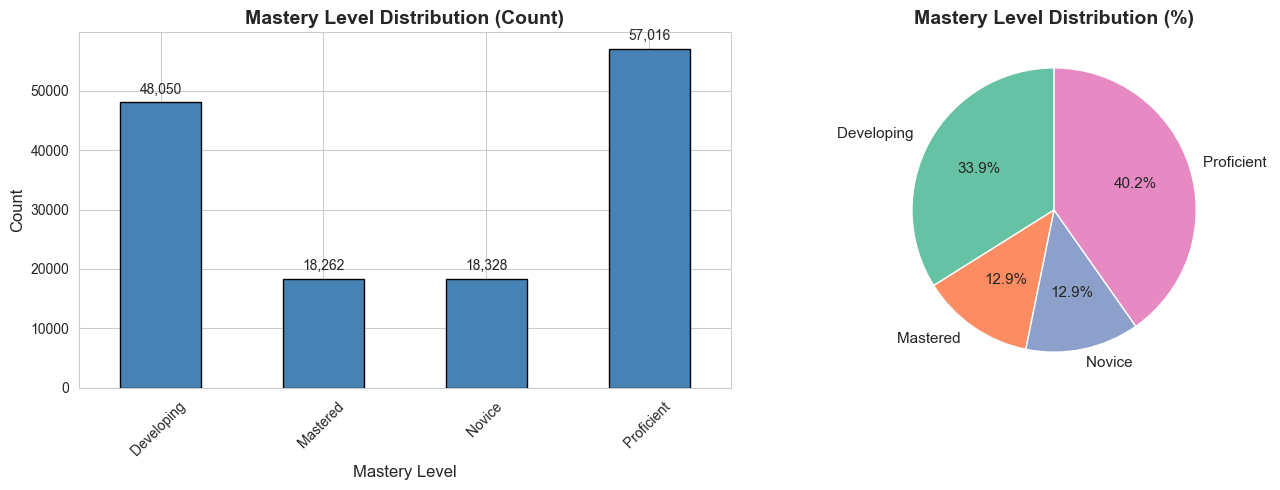

In [ ]:
# 1. 整体掌握度等级分布
print("\n" + "="*80)
print("1️⃣  整体掌握度等级分布")
print("="*80)

mastery_counts = df['mastery_level'].value_counts().sort_index()
mastery_pct = (df['mastery_level'].value_counts(normalize=True) * 100).sort_index()

print("\n掌握度等级统计:")
for level in mastery_counts.index:
    count = mastery_counts[level]
    pct = mastery_pct[level]
    print(f"  • {level:<15} {count:>8,} 条  ({pct:>5.2f}%)")

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 柱状图
ax1 = axes[0]
mastery_counts.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Mastery Level Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Mastery Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(mastery_counts.values):
    ax1.text(i, v + 1000, f'{v:,}', ha='center', va='bottom', fontsize=10)

# 饼图
ax2 = axes[1]
colors = sns.color_palette("Set2", len(mastery_counts))
ax2.pie(mastery_counts.values, labels=mastery_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 11})
ax2.set_title('Mastery Level Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



2️⃣  各知识点的掌握度分布 (Top 20)

前20个知识点的掌握度分布 (%):
mastery_level                       Developing   Mastered   Novice   Proficient 
kc_name                                                                         
Cartesian product                         11.40      21.65     0.57        66.38
union                                      8.05      29.19     1.94        60.81
Difference                                 8.43      40.98     2.06        48.53
Intersection                               6.41      36.11     4.78        52.70
Set                                       12.92       0.00    42.97        44.10
Superkey                                   6.36      48.36     0.42        44.86
Relation                                   5.86      45.26     3.19        45.69
Cardinality                               18.36      64.46     0.85        16.33
Candidate key                              5.72      46.54     0.65        47.08
Attribute                                 10.34      46.25     

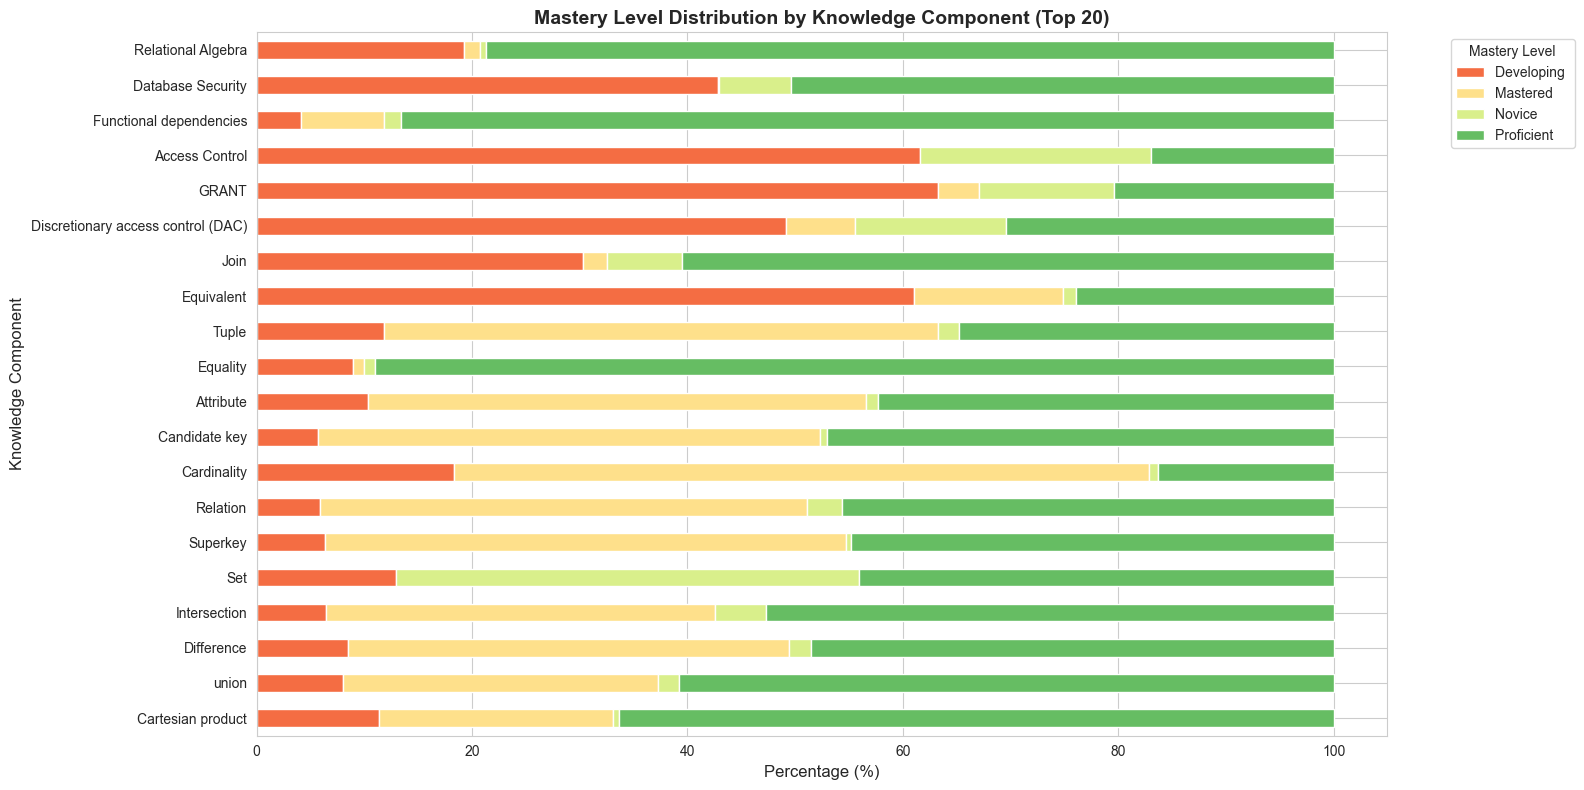

In [ ]:
# 2. 各知识点的掌握度分布
print("\n" + "="*80)
print("2️⃣  各知识点的掌握度分布 (Top 20)")
print("="*80)

# 统计每个知识点的掌握度分布
kc_mastery = pd.crosstab(df['kc_name'], df['mastery_level'], normalize='index') * 100
kc_counts = df['kc_name'].value_counts()

# 选择样本数最多的前20个知识点
top_kcs = kc_counts.head(20).index
kc_mastery_top = kc_mastery.loc[top_kcs]

print(f"\n前20个知识点的掌握度分布 (%):")
print(kc_mastery_top.round(2).to_string())

# 可视化 - 堆叠柱状图
fig, ax = plt.subplots(figsize=(16, 8))
kc_mastery_top.plot(kind='barh', stacked=True, ax=ax, 
                     color=sns.color_palette("RdYlGn", len(kc_mastery_top.columns)))
ax.set_title('Mastery Level Distribution by Knowledge Component (Top 20)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Percentage (%)', fontsize=12)
ax.set_ylabel('Knowledge Component', fontsize=12)
ax.legend(title='Mastery Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



3️⃣  学生维度的掌握度统计

学生平均掌握度得分统计:
  • 平均分: nan
  • 中位数: nan
  • 标准差: nan
  • 最小值: nan
  • 最大值: nan


/Users/jiangchangcheng/WorkSpace/yl_data_process/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/jiangchangcheng/WorkSpace/yl_data_process/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/jiangchangcheng/WorkSpace/yl_data_process/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


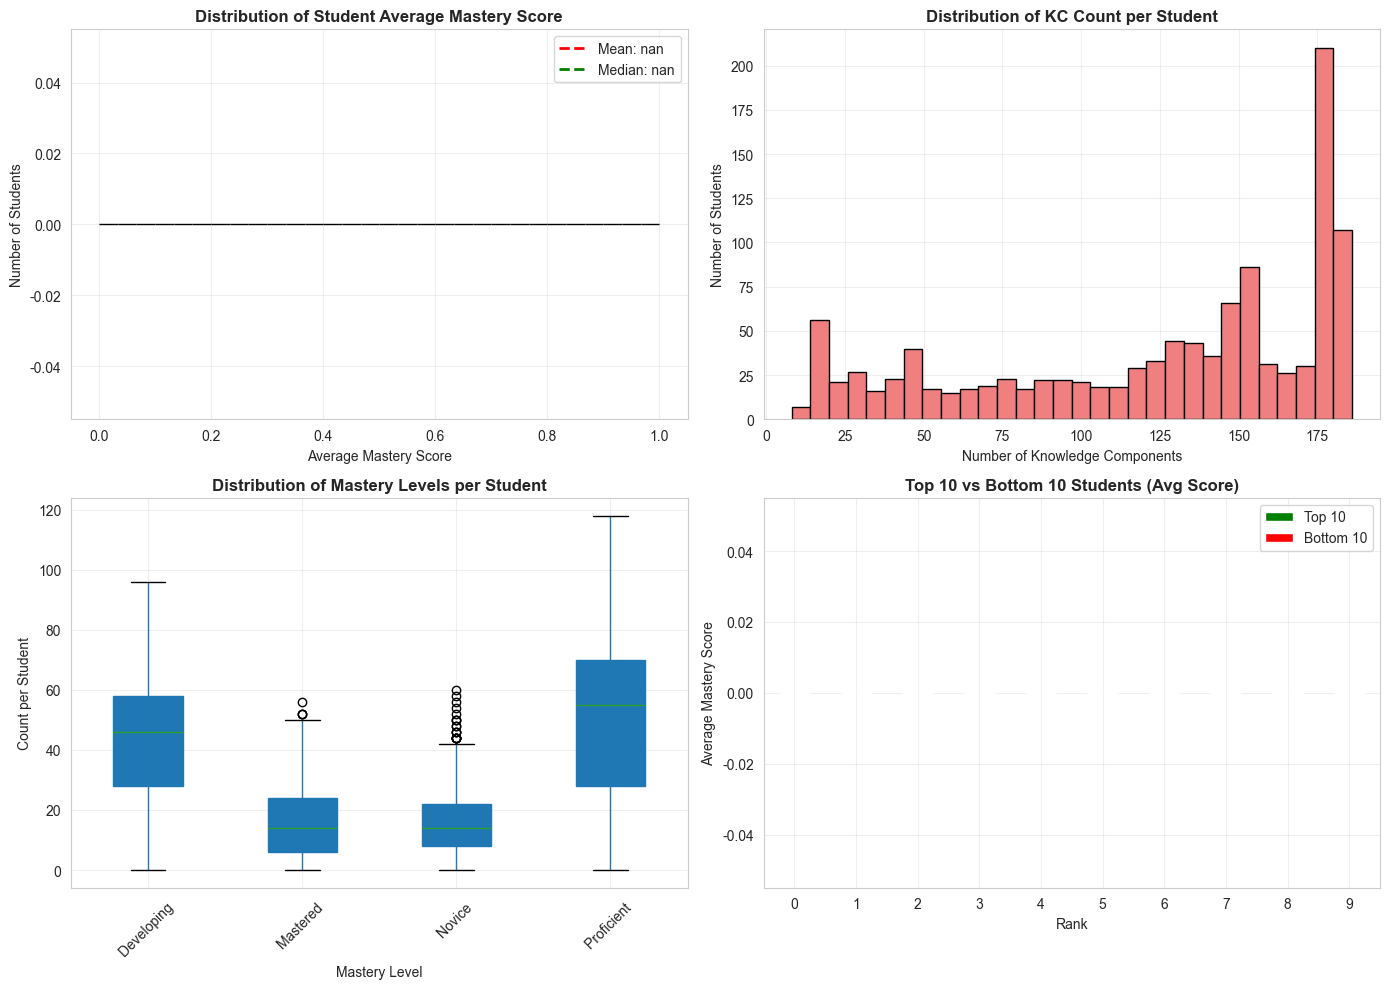

In [ ]:
# 3. 学生维度的掌握度统计
print("\n" + "="*80)
print("3️⃣  学生维度的掌握度统计")
print("="*80)

# 计算每个学生的掌握度分布
student_mastery = df.groupby(['student_id', 'mastery_level']).size().unstack(fill_value=0)
student_mastery_pct = student_mastery.div(student_mastery.sum(axis=1), axis=0) * 100

# 计算每个学生的平均掌握度得分 (Novice=1, Developing=2, Proficient=3, Mastered=4)
mastery_score_map = {'Novice': 1, 'Developing': 2, 'Proficient': 3, 'Mastered': 4}
df['mastery_score'] = df['mastery_level'].map(mastery_score_map)
student_avg_score = df.groupby('student_id')['mastery_score'].mean()

print(f"\n学生平均掌握度得分统计:")
print(f"  • 平均分: {student_avg_score.mean():.2f}")
print(f"  • 中位数: {student_avg_score.median():.2f}")
print(f"  • 标准差: {student_avg_score.std():.2f}")
print(f"  • 最小值: {student_avg_score.min():.2f}")
print(f"  • 最大值: {student_avg_score.max():.2f}")

# 可视化
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 学生平均掌握度得分分布
ax1 = axes[0, 0]
student_avg_score.hist(bins=30, ax=ax1, color='skyblue', edgecolor='black')
ax1.axvline(student_avg_score.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {student_avg_score.mean():.2f}')
ax1.axvline(student_avg_score.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {student_avg_score.median():.2f}')
ax1.set_title('Distribution of Student Average Mastery Score', fontsize=12, fontweight='bold')
ax1.set_xlabel('Average Mastery Score', fontsize=10)
ax1.set_ylabel('Number of Students', fontsize=10)
ax1.legend()
ax1.grid(alpha=0.3)

# 学生掌握度等级数量分布
ax2 = axes[0, 1]
student_total_kc = student_mastery.sum(axis=1)
student_total_kc.hist(bins=30, ax=ax2, color='lightcoral', edgecolor='black')
ax2.set_title('Distribution of KC Count per Student', fontsize=12, fontweight='bold')
ax2.set_xlabel('Number of Knowledge Components', fontsize=10)
ax2.set_ylabel('Number of Students', fontsize=10)
ax2.grid(alpha=0.3)

# 各掌握度等级的学生数量分布箱线图
ax3 = axes[1, 0]
student_mastery.boxplot(ax=ax3, patch_artist=True)
ax3.set_title('Distribution of Mastery Levels per Student', fontsize=12, fontweight='bold')
ax3.set_xlabel('Mastery Level', fontsize=10)
ax3.set_ylabel('Count per Student', fontsize=10)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(alpha=0.3)

# Top 10 和 Bottom 10 学生对比
ax4 = axes[1, 1]
top10_students = student_avg_score.nlargest(10)
bottom10_students = student_avg_score.nsmallest(10)
comparison_data = pd.DataFrame({
    'Top 10': top10_students.values,
    'Bottom 10': bottom10_students.values
})
comparison_data.plot(kind='bar', ax=ax4, color=['green', 'red'])
ax4.set_title('Top 10 vs Bottom 10 Students (Avg Score)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Rank', fontsize=10)
ax4.set_ylabel('Average Mastery Score', fontsize=10)
ax4.tick_params(axis='x', rotation=0)
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# 导入必要的库
import sys
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, log_loss
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("✅ 导入成功")


✅ 导入成功


## ⚠️ 重要：Task4 准确率计算方法说明

本分析使用**方法二（严格解析）**计算 Task4 准确率：
- ✅ **只统计模型给出有效预测答案的样本**
- ❌ **不使用学生历史答题表现（`true_score`）回退填充**
- 📊 **这确保了准确率反映模型的真实预测能力，而非模型预测与学生历史的一致性**

**方法对比**:
- 方法一（旧）：无法解析时回退到 `true_score` → 实际计算的是"模型预测与学生历史的一致性" (约70%)
- 方法二（新）：无法解析时过滤掉该样本 → 计算的是"模型有效预测的准确率" (约83%)


In [ ]:
# 定义评估函数（从 run_experiment.py 复制并简化）
def evaluate_baseline_results(df, model_name="qwen-plus"):
    """
    计算并展示各项评估指标, 包括 ACC, F1-score。
    """
    print("\n" + "="*80)
    print("📊 Baseline 实验结果评估".center(80))
    print("="*80)
    
    if df.empty:
        print("结果DataFrame为空，无法评估。")
        return
    
    eval_df = df.copy()
    
    # --- 数据清洗和规范化 ---
    def normalize_yes_no(val):
        if isinstance(val, str):
            val_lower = val.strip().lower().replace('.', '')
            if val_lower == 'yes': return 1
            if val_lower == 'no': return 0
        return np.nan
    
    def normalize_to_prob(val, high_confidence=0.95, low_confidence=0.05):
        """将 Yes/No 转换为概率值"""
        if isinstance(val, str):
            val_lower = val.strip().lower().replace('.', '')
            if val_lower == 'yes': return high_confidence
            if val_lower == 'no': return low_confidence
        return 0.5
    
    def parse_answer_choice(val):
        """解析Task4的答案选项 (A/B/C/D) 转换为choice_id"""
        if not isinstance(val, str):
            return None
        val = val.strip().upper()
        if val and val[0] in 'ABCDEFGH':
            return val[0]
        return None
    
    eval_df['predicted_answer_choice'] = eval_df['predicted_task4_answer_choice'].apply(parse_answer_choice)
    eval_df['pred_t1_selfpredict'] = eval_df['predicted_task1_selfpredict'].apply(normalize_yes_no)
    
    # --- 核心评估逻辑（方法二：严格解析，不回退到 true_score）---
    def check_answer_correctness(row):
        """检查答案是否正确 - 严格基于模型预测，不使用 true_score 回退"""
        predicted_choice = row.get('predicted_answer_choice')
        if predicted_choice is None:
            return None
        
        question_choices_str = row.get('question_choices')
        if not question_choices_str or question_choices_str == 'None':
            return None  # 方法二：无法解析时返回 None，而不是回退到 true_score
        
        try:
            import ast
            choices = ast.literal_eval(str(question_choices_str))
            if not isinstance(choices, list) or len(choices) == 0:
                return None  # 方法二：无法解析时返回 None
            
            choice_index = ord(predicted_choice) - ord('A')
            if 0 <= choice_index < len(choices):
                predicted_choice_id = choices[choice_index].get('choice_id')
                correct_choice_id = row.get('true_answer_choice_id')
                return 1 if predicted_choice_id == correct_choice_id else 0
        except:
            pass
        
        return None
    
    eval_df['effective_prediction'] = eval_df.apply(check_answer_correctness, axis=1)
    # 方法二：只保留有效预测，不用 true_score 填充
    
    # 计算各项指标
    # 1. 自我预测准确率 (Task1)
    meta_df = eval_df[['true_score', 'pred_t1_selfpredict']].dropna()
    meta_acc = (meta_df['pred_t1_selfpredict'] == meta_df['true_score']).mean() if not meta_df.empty else 0
    
    # 2. 知识点识别准确率 (Task2)
    acc_t2 = (eval_df['predicted_task2_know_name'] == eval_df['true_know_name']).mean()
    
    # 3. 最终答题准确率 (Task4)
    report_df = eval_df[['true_score', 'effective_prediction']].dropna()
    if report_df.empty:
        print("\n⚠️  没有有效的预测结果可供评估。")
        return
    
    acc_t4 = report_df['effective_prediction'].mean()  # effective_prediction 已经是 0/1，直接取平均
    # f1_score 需要真实标签，这里用 true_score 是正确的
    f1_t4 = f1_score(report_df['true_score'], report_df['effective_prediction'], average='weighted')
    
    # 4. 自我预测一致性
    consistency_df = eval_df[['true_score', 'pred_t1_selfpredict']].dropna()
    if not consistency_df.empty:
        consistency_acc = (consistency_df['pred_t1_selfpredict'] == consistency_df['true_score']).mean()
        consistency_f1 = f1_score(consistency_df['true_score'], consistency_df['pred_t1_selfpredict'], average='weighted')
        consistency_df_prob = consistency_df.copy()
        consistency_df_prob['consistency_prob'] = consistency_df_prob['pred_t1_selfpredict'].apply(normalize_to_prob)
        consistency_ce = log_loss(consistency_df_prob['true_score'], consistency_df_prob['consistency_prob'])
    else:
        consistency_acc = consistency_f1 = consistency_ce = 0
    
    # --- 打印报告 ---
    print(f"\n📋 基本信息")
    print(f"   • 使用模型: {model_name}")
    print(f"   • 总测试样本数: {len(eval_df)}")
    print(f"   • 学生数量: {eval_df['student_id'].nunique()}")
    print(f"   • 题目数量: {eval_df['question_id'].nunique()}")
    
    print(f"\n🎯 任务准确率")
    print(f"   • Task1 (自我预测准确率): {meta_acc:.2%}")
    print(f"   • Task2 (知识点识别准确率): {acc_t2:.2%}")
    print(f"   • Task4 (最终答题准确率): {acc_t4:.2%}")
    
    print(f"\n🎓 最终做题结果评估 (Task4)")
    print("-"*80)
    print(f"   • 准确率 (ACC):        {acc_t4:.2%}")
    print(f"   • F1-Score (加权):     {f1_t4:.4f}")
    
    print(f"\n🔮 自我预测一致性 (Task1 vs 实际结果)")
    print("-"*80)
    print(f"   • 准确率 (ACC):        {consistency_acc:.2%}")
    print(f"   • F1-Score (加权):     {consistency_f1:.4f}")
    print(f"   • 交叉熵 (Cross Entropy): {consistency_ce:.4f}")
    
    # --- 详细分类报告 ---
    print("\n" + "="*80)
    print("📊 Task1 详细分类报告 (自我预测)".center(80))
    print("="*80)
    if not consistency_df.empty:
        print(classification_report(
            consistency_df['true_score'], 
            consistency_df['pred_t1_selfpredict'], 
            target_names=['预测错误', '预测正确']
        ))
    
    print("\n" + "="*80)
    print("📊 Task4 详细分类报告 (答案选择)".center(80))
    print("="*80)
    print(classification_report(
        report_df['true_score'], 
        report_df['effective_prediction'], 
        target_names=['答错', '答对']
    ))
    
    # --- 混淆矩阵可视化 ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Task1 混淆矩阵
    if not consistency_df.empty:
        cm_t1 = confusion_matrix(consistency_df['true_score'], consistency_df['pred_t1_selfpredict'])
        disp_t1 = ConfusionMatrixDisplay(confusion_matrix=cm_t1, display_labels=['错误', '正确'])
        disp_t1.plot(cmap='Blues', ax=axes[0])
        axes[0].set_title('Task1: 自我预测混淆矩阵', fontsize=12, fontweight='bold')
    
    # Task4 混淆矩阵
    cm_t4 = confusion_matrix(report_df['true_score'], report_df['effective_prediction'])
    disp_t4 = ConfusionMatrixDisplay(confusion_matrix=cm_t4, display_labels=['错误', '正确'])
    disp_t4.plot(cmap='Greens', ax=axes[1])
    axes[1].set_title('Task4: 答案选择混淆矩阵', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*80)
    print("✅ 评估完成".center(80))
    print("="*80)
    
    return {
        'meta_acc': meta_acc,
        'acc_t2': acc_t2,
        'acc_t4': acc_t4,
        'f1_t4': f1_t4,
        'consistency_acc': consistency_acc,
        'consistency_f1': consistency_f1,
        'consistency_ce': consistency_ce
    }

print("✅ 评估函数定义完成")



✅ 评估函数定义完成


## 🔄 使用方法二重新评估所有实验模式


                               🔄 使用方法二重新评估所有实验模式                                

                               📊 Baseline 实验结果评估                                

📋 基本信息
   • 使用模型: qwen-plus
   • 总测试样本数: 16775
   • 学生数量: 1140
   • 题目数量: 212

🎯 任务准确率
   • Task1 (自我预测准确率): 73.14%
   • Task2 (知识点识别准确率): 97.68%
   • Task4 (最终答题准确率): 82.65%

🎓 最终做题结果评估 (Task4)
--------------------------------------------------------------------------------
   • 准确率 (ACC):        82.65%
   • F1-Score (加权):     0.6830

🔮 自我预测一致性 (Task1 vs 实际结果)
--------------------------------------------------------------------------------
   • 准确率 (ACC):        73.14%
   • F1-Score (加权):     0.7016
   • 交叉熵 (Cross Entropy): 0.6931

                             📊 Task1 详细分类报告 (自我预测)                              
              precision    recall  f1-score   support

        预测错误       0.37      0.21      0.26      3931
        预测正确       0.79      0.89      0.84     12837

    accuracy                           0.73     167

/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 38169 (\N{CJK UNIFIED IDEOGRAPH-9519}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000g

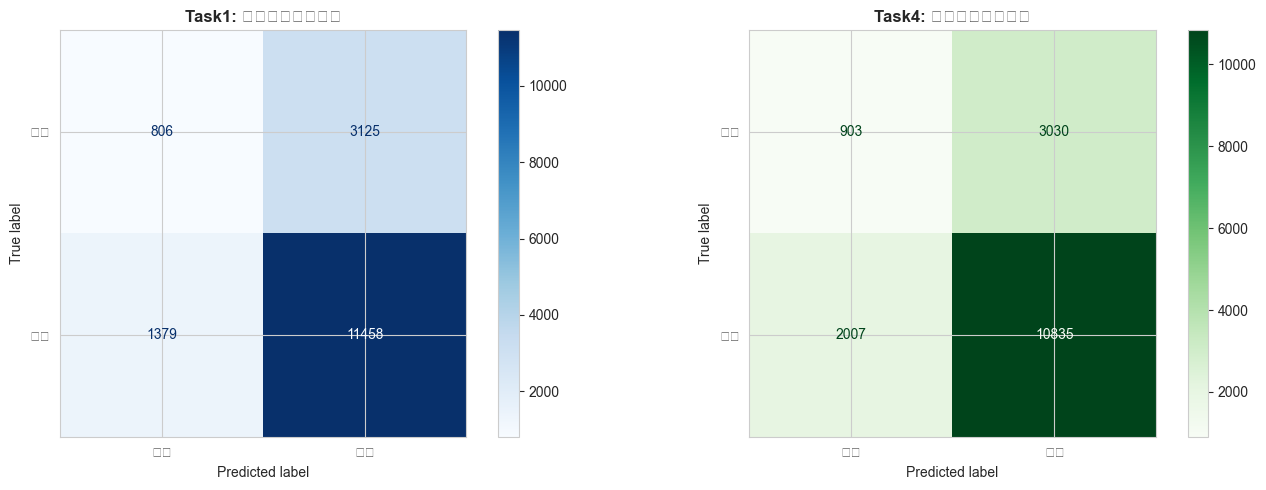


                                     ✅ 评估完成                                     

                               📊 Baseline 实验结果评估                                

📋 基本信息
   • 使用模型: qwen-plus
   • 总测试样本数: 16775
   • 学生数量: 1140
   • 题目数量: 212

🎯 任务准确率
   • Task1 (自我预测准确率): 82.55%
   • Task2 (知识点识别准确率): 97.83%
   • Task4 (最终答题准确率): 85.46%

🎓 最终做题结果评估 (Task4)
--------------------------------------------------------------------------------
   • 准确率 (ACC):        85.46%
   • F1-Score (加权):     0.6693

🔮 自我预测一致性 (Task1 vs 实际结果)
--------------------------------------------------------------------------------
   • 准确率 (ACC):        82.55%
   • F1-Score (加权):     0.8229
   • 交叉熵 (Cross Entropy): 0.6931

                             📊 Task1 详细分类报告 (自我预测)                              
              precision    recall  f1-score   support

        预测错误       0.64      0.59      0.61      3932
        预测正确       0.88      0.90      0.89     12842

    accuracy                           0.83     16

/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 38169 (\N{CJK UNIFIED IDEOGRAPH-9519}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000g

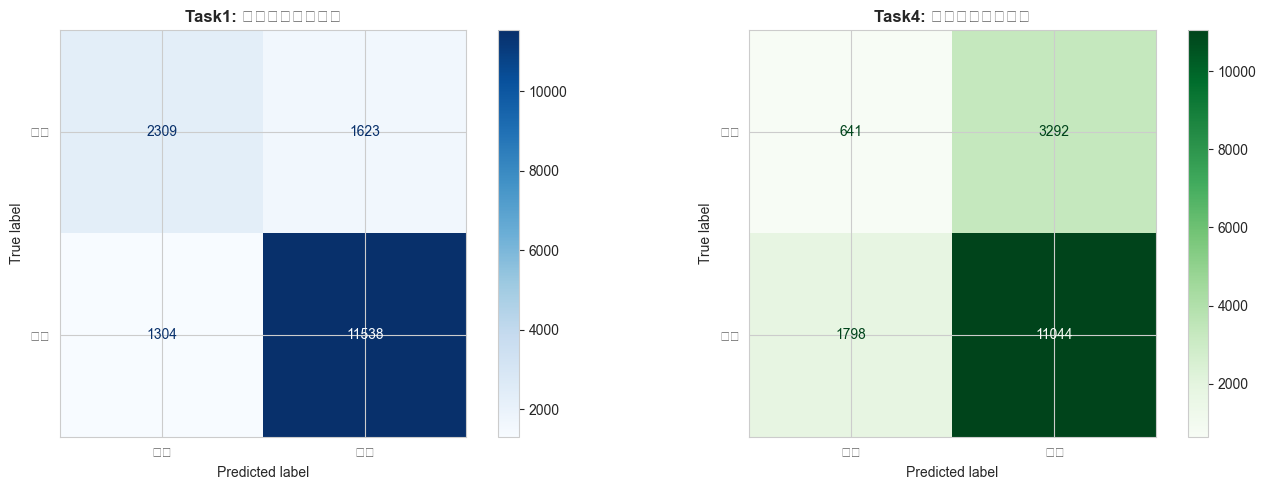


                                     ✅ 评估完成                                     

                               📊 Baseline 实验结果评估                                

📋 基本信息
   • 使用模型: qwen-plus
   • 总测试样本数: 16775
   • 学生数量: 1140
   • 题目数量: 212

🎯 任务准确率
   • Task1 (自我预测准确率): 72.93%
   • Task2 (知识点识别准确率): 97.67%
   • Task4 (最终答题准确率): 82.75%

🎓 最终做题结果评估 (Task4)
--------------------------------------------------------------------------------
   • 准确率 (ACC):        82.75%
   • F1-Score (加权):     0.6827

🔮 自我预测一致性 (Task1 vs 实际结果)
--------------------------------------------------------------------------------
   • 准确率 (ACC):        72.93%
   • F1-Score (加权):     0.6923
   • 交叉熵 (Cross Entropy): 0.6931

                             📊 Task1 详细分类报告 (自我预测)                              
              precision    recall  f1-score   support

        预测错误       0.34      0.17      0.22      3931
        预测正确       0.78      0.90      0.84     12838

    accuracy                           0.73     16

/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 38169 (\N{CJK UNIFIED IDEOGRAPH-9519}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000gn/T/ipykernel_51062/3830837934.py:162: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6h/g0rl35kx16l6q670n_8qfbsc0000g

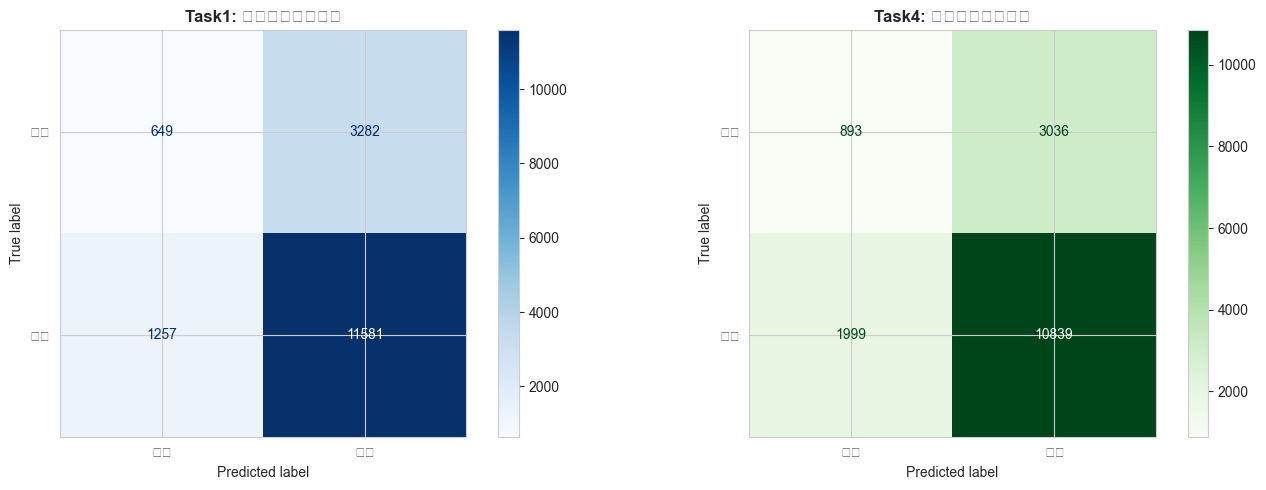


                                     ✅ 评估完成                                     

                                   ✅ 所有模式评估完成                                   


In [ ]:
# 重新评估三个实验模式
print("="*80)
print("🔄 使用方法二重新评估所有实验模式".center(80))
print("="*80)

baseline_metrics = evaluate_baseline_results(df_baseline, model_name="qwen-plus")
mastery_metrics = evaluate_baseline_results(df_mastery, model_name="qwen-plus") 
tutoring_metrics = evaluate_baseline_results(df_tutoring, model_name="qwen-plus")

print("\n" + "="*80)
print("✅ 所有模式评估完成".center(80))
print("="*80)


## 📊 三模式对比总结（基于方法二）


In [ ]:
# 生成三模式对比表格
if baseline_metrics and mastery_metrics and tutoring_metrics:
    comparison_df = pd.DataFrame({
        '指标': [
            'Task1 自我预测准确率',
            'Task2 知识点识别准确率', 
            'Task4 最终答题准确率',
            'Task4 F1-Score',
            'Task1 一致性准确率',
            'Task1 一致性 F1-Score',
            'Task1 一致性交叉熵'
        ],
        'Baseline': [
            f"{baseline_metrics['meta_acc']:.2%}",
            f"{baseline_metrics['acc_t2']:.2%}",
            f"{baseline_metrics['acc_t4']:.2%}",
            f"{baseline_metrics['f1_t4']:.4f}",
            f"{baseline_metrics['consistency_acc']:.2%}",
            f"{baseline_metrics['consistency_f1']:.4f}",
            f"{baseline_metrics['consistency_ce']:.4f}"
        ],
        'Mastery Only': [
            f"{mastery_metrics['meta_acc']:.2%}",
            f"{mastery_metrics['acc_t2']:.2%}",
            f"{mastery_metrics['acc_t4']:.2%}",
            f"{mastery_metrics['f1_t4']:.4f}",
            f"{mastery_metrics['consistency_acc']:.2%}",
            f"{mastery_metrics['consistency_f1']:.4f}",
            f"{mastery_metrics['consistency_ce']:.4f}"
        ],
        'Tutoring Only': [
            f"{tutoring_metrics['meta_acc']:.2%}",
            f"{tutoring_metrics['acc_t2']:.2%}",
            f"{tutoring_metrics['acc_t4']:.2%}",
            f"{tutoring_metrics['f1_t4']:.4f}",
            f"{tutoring_metrics['consistency_acc']:.2%}",
            f"{tutoring_metrics['consistency_f1']:.4f}",
            f"{tutoring_metrics['consistency_ce']:.4f}"
        ]
    })
    
    print("\n" + "="*80)
    print("📊 三模式核心指标对比（方法二）".center(80))
    print("="*80)
    print("\n")
    print(comparison_df.to_string(index=False))
    print("\n" + "="*80)
    
    # 计算提升幅度
    print("\n📈 相对 Baseline 的提升")
    print("="*80)
    print(f"\n🟢 Mastery Only:")
    print(f"   Task1 自我预测: {(mastery_metrics['meta_acc'] - baseline_metrics['meta_acc'])*100:+.2f}个百分点")
    print(f"   Task4 最终答题: {(mastery_metrics['acc_t4'] - baseline_metrics['acc_t4'])*100:+.2f}个百分点")
    
    print(f"\n🟡 Tutoring Only:")
    print(f"   Task1 自我预测: {(tutoring_metrics['meta_acc'] - baseline_metrics['meta_acc'])*100:+.2f}个百分点")
    print(f"   Task4 最终答题: {(tutoring_metrics['acc_t4'] - baseline_metrics['acc_t4'])*100:+.2f}个百分点")
    print("\n" + "="*80)



                                📊 三模式核心指标对比（方法二）                                


                指标 Baseline Mastery Only Tutoring Only
     Task1 自我预测准确率   73.14%       82.55%        72.93%
    Task2 知识点识别准确率   97.68%       97.83%        97.67%
     Task4 最终答题准确率   82.65%       85.46%        82.75%
    Task4 F1-Score   0.6830       0.6693        0.6827
      Task1 一致性准确率   73.14%       82.55%        72.93%
Task1 一致性 F1-Score   0.7016       0.8229        0.6923
      Task1 一致性交叉熵   0.6931       0.6931        0.6931


📈 相对 Baseline 的提升

🟢 Mastery Only:
   Task1 自我预测: +9.41个百分点
   Task4 最终答题: +2.81个百分点

🟡 Tutoring Only:
   Task1 自我预测: -0.21个百分点
   Task4 最终答题: +0.10个百分点

